# Preprocessing jet-images
Author: Javier Duarte

## Load `NumPy` array files
Here we load the `NumPy` array files. The files are available in a CERNBox: https://cernbox.cern.ch/index.php/s/hMHl6mYSqICOXKl

In [1]:
import glob
import numpy as np
# get input numpy arrays
inputs = {}
inputs['TT'] = glob.glob('/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/TT/*job*.npy')
inputs['QCD120'] = glob.glob('/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/QCD_120to170/*job*.npy')
inputs['QCD170'] = glob.glob('/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/QCD_170to300/*job*.npy')
inputs['QCD300'] = glob.glob('/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/QCD_300to470/*job*.npy')
inputs['QCD470'] = glob.glob('/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/QCD_470to600/*job*.npy')

import random
fraction_file = 0.3
max_file = 1

list_params = {}
params = {}
for key, input_files in inputs.items():
    list_params[key] = []
    print(key,len(input_files),"files")
    last_file = int(len(input_files)*fraction_file)+1 if fraction_file>0 else -1
    last_file = min(max_file, len(input_files)) if max_file else last_file
    if key=='TT': last_file*=20
    print("Getting",last_file,"/",len(input_files),"files")
    for in_file in input_files[:last_file]:
        try:
            print(in_file)
            arr = np.load(in_file)
            list_params[key].append(arr)
        except ValueError:
            print('bad file: %s'%in_file)
        except IOError:
            print('bad io',in_file)
    params[key] = np.concatenate(list_params[key])

TT 7 files
Getting 20 / 7 files
/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/TT/params0.npy_job53_file0.npy
/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/TT/params0.npy_job52_file0.npy
/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/TT/params0.npy_job5_file0.npy
/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/TT/params0.npy_job54_file0.npy
/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/TT/params0.npy_job51_file0.npy
/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/TT/params0.npy_job6_file0.npy
/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntran/cms-open-data-ml/MLTutorialData/TT/params0.npy_job50_file0.npy
QCD120 2 files
Getting 1 / 2 files
/Users/ntran/Documents/Research/AIProj/tutorial/ml-hats-ntra

## Convert to `pandas` DataFrames
Here, we convert to `pandas` DataFrames

In [2]:
import pandas as pd
pt_min = 200
pt_max = 500

df_dict_jet = {}
df_dict_jet['TT'] = pd.DataFrame(params['TT'],
                                 columns=['run', 'lumi', 'event', 'met', 'sumet', 'rho', 'pthat', 
                                          'mcweight', 'njet_ak7', 'jet_pt_ak7', 'jet_eta_ak7', 
                                          'jet_phi_ak7', 'jet_E_ak7', 'jet_msd_ak7', 'jet_area_ak7', 
                                          'jet_jes_ak7', 'jet_tau21_ak7', 'jet_isW_ak7', 'jet_ncand_ak7',
                                          'ak7pfcand_ijet'])
df_dict_jet['TT'] = df_dict_jet['TT'].drop_duplicates()
df_dict_jet['TT'] =  df_dict_jet['TT'][(df_dict_jet['TT'].jet_pt_ak7 > pt_min) & (df_dict_jet['TT'].jet_pt_ak7 < pt_max) &  (df_dict_jet['TT'].jet_isW_ak7==1)]

df_dict_cand = {}
df_dict_cand['TT'] = pd.DataFrame(params['TT'],
                                  columns=['event', 'jet_pt_ak7', 'jet_isW_ak7', 'ak7pfcand_pt', 'ak7pfcand_eta', 'ak7pfcand_phi', 'ak7pfcand_id', 'ak7pfcand_charge', 'ak7pfcand_ijet'])
df_dict_cand['TT'] =  df_dict_cand['TT'][(df_dict_cand['TT'].jet_pt_ak7 > pt_min) & (df_dict_cand['TT'].jet_pt_ak7 < pt_max) &  (df_dict_cand['TT'].jet_isW_ak7==1)]

print('number of W jets: %i'%len(df_dict_jet['TT']))

for QCDbin in ['QCD120','QCD170','QCD300','QCD470']:
    df_dict_jet[QCDbin] = pd.DataFrame(params[QCDbin],columns=['run', 'lumi', 'event', 'met', 'sumet', 'rho', 'pthat', 
                                                               'mcweight', 'njet_ak7', 'jet_pt_ak7', 'jet_eta_ak7', 
                                                               'jet_phi_ak7', 'jet_E_ak7', 'jet_msd_ak7', 'jet_area_ak7', 
                                                               'jet_jes_ak7', 'jet_tau21_ak7', 'jet_isW_ak7', 'jet_ncand_ak7',
                                                               'ak7pfcand_ijet'])
    df_dict_jet[QCDbin] = df_dict_jet[QCDbin].drop_duplicates()
    df_dict_jet[QCDbin] =  df_dict_jet[QCDbin][(df_dict_jet[QCDbin].jet_pt_ak7 > pt_min) & (df_dict_jet[QCDbin].jet_pt_ak7 < 500) &  (df_dict_jet[QCDbin].jet_isW_ak7==0)]
    # take every 20th jet just to make the training faster and have a sample roughly the size of W jets
    df_dict_jet[QCDbin] = df_dict_jet[QCDbin].iloc[::20, :]
    
    df_dict_cand[QCDbin] = pd.DataFrame(params[QCDbin],columns=['event', 'jet_pt_ak7', 'jet_isW_ak7', 'ak7pfcand_pt', 'ak7pfcand_eta', 'ak7pfcand_phi', 'ak7pfcand_id', 'ak7pfcand_charge', 'ak7pfcand_ijet'])
    df_dict_cand[QCDbin] =  df_dict_cand[QCDbin][(df_dict_cand[QCDbin].jet_pt_ak7 > 200) & (df_dict_cand[QCDbin].jet_pt_ak7 < 500) &  (df_dict_cand[QCDbin].jet_isW_ak7==0)]
    
    print('number of QCD jets in bin %s: %i'%( QCDbin, len(df_dict_jet[QCDbin])))
    
df_dict_jet['QCD'] = pd.concat([df_dict_jet['QCD120'],df_dict_jet['QCD170'],df_dict_jet['QCD300'],df_dict_jet['QCD470']])
df_dict_cand['QCD'] = pd.concat([df_dict_cand['QCD120'],df_dict_cand['QCD170'],df_dict_cand['QCD300'],df_dict_cand['QCD470']])


number of W jets: 650
number of QCD jets in bin QCD120: 37
number of QCD jets in bin QCD170: 690
number of QCD jets in bin QCD300: 1649
number of QCD jets in bin QCD470: 526


## Define functions for rotation and preprocessing jet images
Here, we define functions for rotation and preprocessing jet images

In [3]:
# rotation + (possible) reflection needed later
def rotate_and_reflect(x,y,w):
    rot_x = []
    rot_y = []
    theta = 0
    maxPt = -1
    for ix, iy, iw in zip(x, y, w):
        dv = np.matrix([[ix],[iy]])-np.matrix([[x.iloc[0]],[y.iloc[0]]])
        dR = np.linalg.norm(dv)
        thisPt = iw
        if dR > 0.35 and thisPt > maxPt:
            maxPt = thisPt
            # rotation in eta-phi plane c.f  https://arxiv.org/abs/1407.5675 and https://arxiv.org/abs/1511.05190:
            # theta = -np.arctan2(iy,ix)-np.radians(90)
            # rotation by lorentz transformation c.f. https://arxiv.org/abs/1704.02124:
            px = iw * np.cos(iy)
            py = iw * np.sin(iy)
            pz = iw * np.sinh(ix)
            theta = np.arctan2(py,pz)+np.radians(90)
            
    c, s = np.cos(theta), np.sin(theta)
    R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
    for ix, iy, iw in zip(x, y, w):
        # rotation in eta-phi plane:
        #rot = R*np.matrix([[ix],[iy]])
        #rix, riy = rot[0,0], rot[1,0]
        # rotation by lorentz transformation
        px = iw * np.cos(iy)
        py = iw * np.sin(iy)
        pz = iw * np.sinh(ix)
        rot = R*np.matrix([[py],[pz]])
        px1 = px
        py1 = rot[0,0]
        pz1 = rot[1,0]
        iw1 = np.sqrt(px1*px1+py1*py1)
        rix, riy = np.arcsinh(pz1/iw1), np.arcsin(py1/iw1)
        rot_x.append(rix)
        rot_y.append(riy)
        
    # now reflect if leftSum > rightSum
    leftSum = 0
    rightSum = 0
    for ix, iy, iw in zip(x, y, w):
        if ix > 0: 
            rightSum += iw
        elif ix < 0:
            leftSum += iw
    if leftSum > rightSum:
        ref_x = [-1.*rix for rix in rot_x]
        ref_y = rot_y
    else:
        ref_x = rot_x
        ref_y = rot_y
    
    return np.array(ref_x), np.array(ref_y)

import matplotlib as mpl
import keras.backend as K

nx = 30 # size of image in eta
ny = 30 # size of image in phi
xbins = np.linspace(-1.4,1.4,nx+1)
ybins = np.linspace(-1.4,1.4,ny+1)

def prepareImages(process, df_dict_cand, df_dict_jet):
    list_x = []
    list_y = []
    list_w = []
    #if K.image_data_format()=='tf':
    #    jet_images = np.zeros((len(df_dict_jet[process]), nx, ny, 1))
    #else:        
    #    jet_images = np.zeros((len(df_dict_jet[process]), 1, nx, ny))
    jet_images = np.zeros((len(df_dict_jet[process]), nx, ny, 1))
    
    for i in range(0,len(df_dict_jet[process])):
        # get the ith jet
        df_dict_cand_i = df_dict_cand[process][(df_dict_cand[process]['ak7pfcand_ijet'] == df_dict_jet[process]['ak7pfcand_ijet'].iloc[i]) & (df_dict_cand[process]['event'] == df_dict_jet[process]['event'].iloc[i]) ]
        # relative eta
        x = df_dict_cand_i['ak7pfcand_eta']-df_dict_cand_i['ak7pfcand_eta'].iloc[0]
        # relative phi
        y = df_dict_cand_i['ak7pfcand_phi']-df_dict_cand_i['ak7pfcand_phi'].iloc[0]
        weights = df_dict_cand_i['ak7pfcand_pt'] # pt of candidate is the weight
        x,y = rotate_and_reflect(x,y,weights)
        list_x.append(x)
        list_y.append(y)
        list_w.append(weights)
        hist, xedges, yedges = np.histogram2d(x, y, weights=weights, bins=(xbins,ybins))
        for ix in range(0,nx):
            for iy in range(0,ny):
                #if K.image_data_format()=='tf':
                #    jet_images[i,ix,iy,0] = hist[ix,iy]
                #else:
                #    jet_images[i,0,ix,iy] = hist[ix,iy]
                jet_images[i,ix,iy,0] = hist[ix,iy]   
    return jet_images

Using TensorFlow backend.


## Prepare jet images
Here, we run the pre-defined functions to prepare the jet images

In [4]:
jet_images_dict = {}
# 4D tensor (tensorflow backend)
# 1st dim is jet index
# 2nd dim is eta bin
# 3rd dim is phi bin
# 4th dim is pt value (or rgb layer, etc.)

jet_images_dict['TT'] = prepareImages('TT', df_dict_cand, df_dict_jet)
jet_images_dict['QCD'] = prepareImages('QCD', df_dict_cand, df_dict_jet)

## Plotting jet-images
Let's plot some jet-images (individual jets and averaged over all jets)

**Question 1:**  Try to plot the average W and QCD jet-images.

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.      

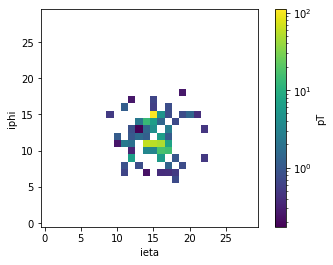

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

# plot one W jet
i = 7
plt.figure('W') 
plt.imshow(jet_images_dict['TT'][i,:,:,0].T, norm=mpl.colors.LogNorm(), origin='lower', interpolation='none')
cbar = plt.colorbar()
cbar.set_label('pT')
plt.xlabel('ieta')
plt.ylabel('iphi')
plt.show()

# plot average W jet

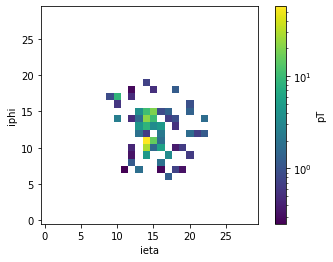

In [8]:
# plot one QCD jet
i = 12
plt.figure() 
plt.imshow(jet_images_dict['QCD'][i,:,:,0].T, norm=mpl.colors.LogNorm(), origin='lower', interpolation='none')
cbar = plt.colorbar()
cbar.set_label('pT')
plt.xlabel('ieta')
plt.ylabel('iphi')
plt.show()

# plot average QCD jet

## Define our convolutional model
**Question 2:** Here we have a relatively simple `Conv2D` model using regularization, batch normalization, max pooling, and a fully connected layer before the ouput. Implement the network defined in https://arxiv.org/pdf/1511.05190.pdf. Compare the performance and number of parameters when using fully connected layers instead of convolutional layers.

In [10]:
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense, BatchNormalization, Concatenate
from keras.regularizers import l1,l2
nx = 30
ny = 30
inputs = Input(shape=(nx, ny, 1), name='input')
x = Conv2D(8, (3, 3), 
           strides=(1, 1), 
           padding='same', 
           activation='relu', 
           name='conv2d_1', 
           kernel_regularizer=l2(0.01))(inputs)
x = BatchNormalization(momentum=0.6, name='batchnorm_1')(x)
x = MaxPool2D(pool_size=(2, 2), name='maxpool2d_1')(x)
x = Flatten(name='flatten')(x)
x = Dense(64, activation='relu', name='dense')(x)
outputs = Dense(1, activation='sigmoid', name='output')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 30, 30, 8)         32        
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 15, 15, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                115264    
_________________________________________________________________
output (Dense)               (None, 1)                 65  

## Dividing the data into testing and training dataset

We will split the data into two parts (one for training+validation and one for testing).
**Note:**  We will not apply "image normalization" preprocessing: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html.
**Question 3:** Why not?

In [11]:
jet_images = np.concatenate([jet_images_dict['TT'],
                             jet_images_dict['QCD']])
jet_labels = np.concatenate([np.ones(len(jet_images_dict['TT'])), 
                             np.zeros(len(jet_images_dict['QCD']))])

X = jet_images
Y = jet_labels

from sklearn.model_selection import train_test_split
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

print('number of W jets for training/validation: %i'%np.sum(Y_train_val==1))
print('number of QCD jets for training/validation: %i'%np.sum(Y_train_val==0))

print('number of W jets for testing: %i'%np.sum(Y_test==1))
print('number of QCD jets for testing: %i'%np.sum(Y_test==0))

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# model checkpoint callback
# this saves our model architecture + parameters into conv2d_model.h5
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('conv2d_model.h5', monitor='val_loss', 
                                   verbose=0, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)

number of W jets for training/validation: 524
number of QCD jets for training/validation: 2317
number of W jets for testing: 126
number of QCD jets for testing: 585


## Run training
Here, we run the training.

In [13]:
# Train classifier
history = model.fit(X_train_val, Y_train_val, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=0, # switch to 1 for more verbosity
                    callbacks=[early_stopping, model_checkpoint], 
                    validation_split=0.25)

## Plot performance
Here, we plot the history of the training and the performance in a ROC curve

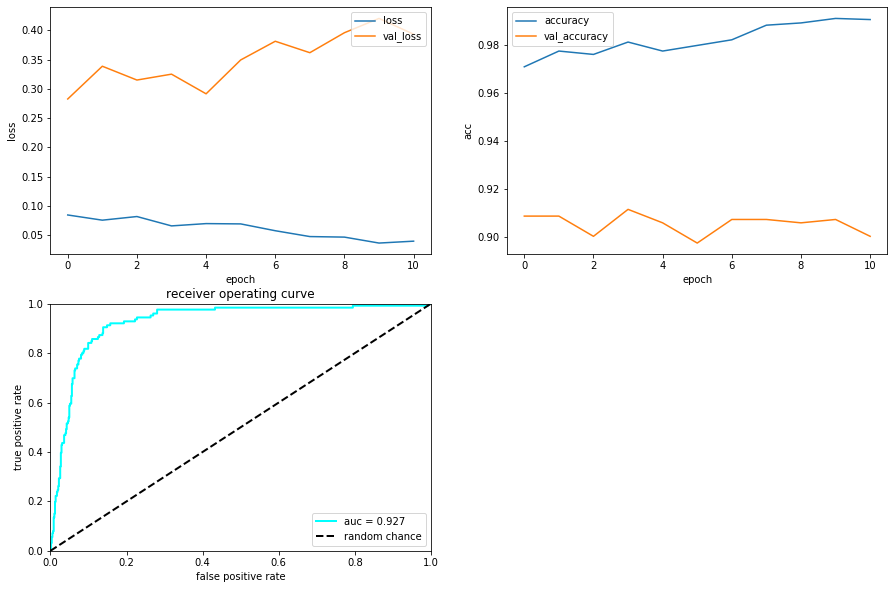

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15,10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.legend(loc="upper left")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve')
ax.legend(loc="lower right")
plt.show()